Machine Learning

In [83]:
from pyspatialml import Raster
import os
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
print(sklearn.__version__)

1.4.0


In [84]:
os.chdir("Q:\\5m Training Data Rasters V2\\")

Loading landslide presence/absence points

In [87]:
data = pd.read_csv('E:\\Training Data\\TrainingData_50%roadsremoved_2_RF_FS.csv')

In [88]:
data.head()

#data.drop(columns=['geometry'], inplace=True)

Landslide  eastness    profile  northernes       spi       tri       twi  \
0          0  0.501105 -11.345300   -0.865386 -1.249440  0.924816   7.47701   
1          0  0.303129   0.804059    0.952949 -3.083090  0.030275  11.97080   
2          0 -0.978111 -11.616400   -0.208084  2.620640  2.470670   9.08558   
3          0  0.793612  -4.607510   -0.608424 -1.933110  0.580487   7.65612   
4          0 -0.353161 -25.208400   -0.935562  0.196974  4.946400   5.50977   

   elevation   d_river  landforms  d_roads  losmasse      ndvi   a_perc  \
0    37.6218  148.6230          5  517.814       130  0.254263  1904.09   
1    38.8094  128.7100          5  169.992       130  0.343899  2037.47   
2    56.4684  121.9150          6  310.503       130  0.303695  2008.17   
3    31.5688   81.4413          5  513.673       130  0.352407  1994.25   
4    33.6191  627.6550          6  136.261       130  0.252834  2085.11   

   landuse  soil_con  
0        5         3  
1       10         7  
2        2         3  
3       10         7  
4        5         2

In [89]:
data.describe()

Landslide     eastness      profile   northernes          spi  \
count  1396.000000  1396.000000  1396.000000  1396.000000  1396.000000   
mean      0.500716    -0.059639     9.544104    -0.057280    -0.393516   
std       0.500179     0.736205   100.525278     0.672218     4.183939   
min       0.000000    -0.999999  -430.919000    -0.999995   -11.529400   
25%       0.000000    -0.805659   -40.008025    -0.694951    -1.158500   
50%       1.000000    -0.130133     2.033375    -0.091841     0.550940   
75%       1.000000     0.715418    48.983275     0.582779     2.025043   
max       1.000000     0.999997   596.416000     1.000000    11.284900   

               tri          twi    elevation      d_river    landforms  \
count  1396.000000  1396.000000  1396.000000  1396.000000  1396.000000   
mean      5.833515     6.416734   238.229670   263.524617     5.005014   
std       4.438203     2.064330   270.766236   322.365641     2.248212   
min       0.027144     0.700000     0.488276     0.000000     0.000000   
25%       2.686495     5.036738    40.421525    62.806300     4.000000   
50%       5.033710     5.952410   116.499000   156.888500     6.000000   
75%       7.738580     7.267592   358.652000   354.136250     6.000000   
max      53.601100    17.896800  1454.900000  5165.250000    10.000000   

           d_roads     losmasse         ndvi       a_perc      landuse  \
count  1396.000000  1396.000000  1396.000000  1396.000000  1396.000000   
mean    310.824865    85.455587     0.361355  2404.687487     3.287249   
std     507.794811    48.066026     0.110730   647.339231     2.338368   
min       0.000000    11.000000    -0.053911   667.208000     1.000000   
25%      19.224000    50.000000     0.308901  1936.772500     2.000000   
50%      87.878650    81.000000     0.383320  2376.840000     2.000000   
75%     397.533750   130.000000     0.431506  2795.002500     5.000000   
max    5032.320000   130.000000     0.569498  4622.830000    11.000000   

          soil_con  
count  1396.000000  
mean      2.185530  
std       1.113279  
min       1.000000  
25%       1.000000  
50%       2.000000  
75%       3.000000  
max       7.000000

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Landslide   1396 non-null   int64  
 1   eastness    1396 non-null   float64
 2   profile     1396 non-null   float64
 3   northernes  1396 non-null   float64
 4   spi         1396 non-null   float64
 5   tri         1396 non-null   float64
 6   twi         1396 non-null   float64
 7   elevation   1396 non-null   float64
 8   d_river     1396 non-null   float64
 9   landforms   1396 non-null   int64  
 10  d_roads     1396 non-null   float64
 11  losmasse    1396 non-null   int64  
 12  ndvi        1396 non-null   float64
 13  a_perc      1396 non-null   float64
 14  landuse     1396 non-null   int64  
 15  soil_con    1396 non-null   int64  
dtypes: float64(11), int64(5)
memory usage: 174.6 KB


Making a stack of our predictive rasters

In [91]:
# 5 meter rasters, stored in "Q:\\5m Training Data Rasters V2\\" 

predictors = ["eastness.tif",
              "profile.tif",
              "northernes.tif",
              "spi.tif",
              "tri.tif",
              "twi.tif",
              "elevation.tif",
              "d_river.tif",
              "landforms.tif",
              "d_roads.tif",
              "losmasse.tif",
              "ndvi.tif",
              "a_perc.tif",
              "landuse.tif",
              "soil_con.tif",
            ] 
            


Updating raster names

In [92]:
stack = Raster(predictors)

In [93]:
stack.names

dict_keys(['eastness', 'profile', 'northernes', 'spi', 'tri', 'twi', 'elevation', 'd_river', 'landforms', 'd_roads', 'losmasse', 'ndvi', 'a_perc', 'landuse', 'soil_con'])

c:\ProgramData\anaconda3\envs\sklearnML\Lib\site-packages\matplotlib\image.py:499: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)


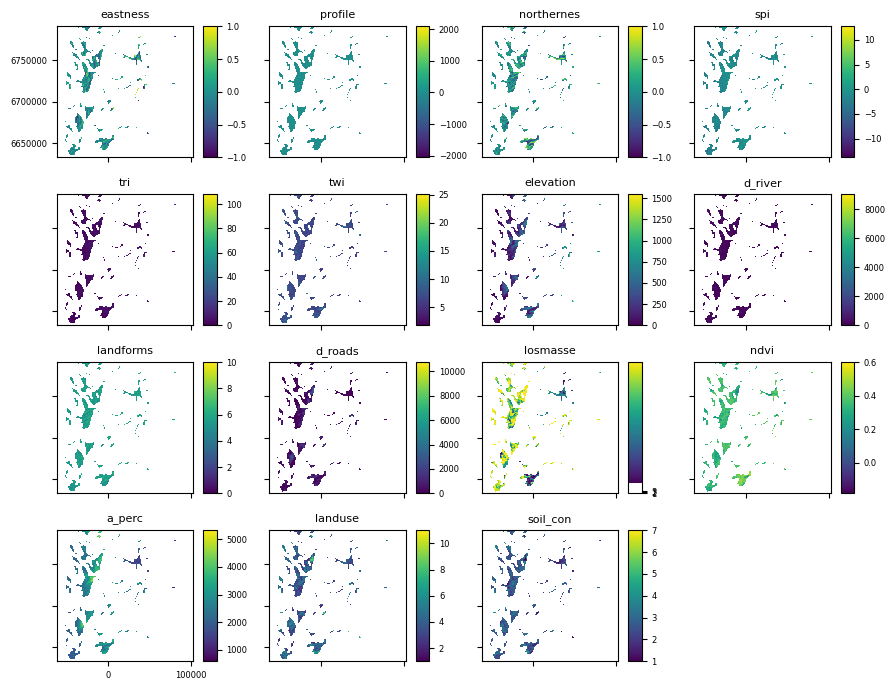

In [94]:

axs = stack.plot(figsize=(9, 7))
ax = axs.flatten()[10]
im = ax.images
im[0].colorbar.set_ticks([1,2,3])
ax = axs.flatten()[8]
ax.tick_params(axis='x', labelrotation=65)

plt.tight_layout()
plt.show()

Importing packages for Machine Learning

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

In [96]:
landforms_idx = list(stack.names).index("landforms")
soil_idx = list(stack.names).index("losmasse")
landuse_idx = list(stack.names).index("landuse")
soilcon_idx = list(stack.names).index("soil_con")

print(landforms_idx, soil_idx, landuse_idx, soilcon_idx)




8 10 13 14


In [97]:
categorical_features = [8, 10, 13, 14]

In [98]:
numerical_features = [0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12]

In [99]:
preprocessor = ColumnTransformer([
    ('ohe_soil', OneHotEncoder(categories='auto', handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numerical_features)])

Separating features from the target variable (class label)

In [100]:
X = data.loc[:, stack.names]

In [101]:
X[:5]

eastness    profile  northernes       spi       tri       twi  elevation  \
0  0.501105 -11.345300   -0.865386 -1.249440  0.924816   7.47701    37.6218   
1  0.303129   0.804059    0.952949 -3.083090  0.030275  11.97080    38.8094   
2 -0.978111 -11.616400   -0.208084  2.620640  2.470670   9.08558    56.4684   
3  0.793612  -4.607510   -0.608424 -1.933110  0.580487   7.65612    31.5688   
4 -0.353161 -25.208400   -0.935562  0.196974  4.946400   5.50977    33.6191   

    d_river  landforms  d_roads  losmasse      ndvi   a_perc  landuse  \
0  148.6230          5  517.814       130  0.254263  1904.09        5   
1  128.7100          5  169.992       130  0.343899  2037.47       10   
2  121.9150          6  310.503       130  0.303695  2008.17        2   
3   81.4413          5  513.673       130  0.352407  1994.25       10   
4  627.6550          6  136.261       130  0.252834  2085.11        5   

   soil_con  
0         3  
1         7  
2         3  
3         7  
4         2

Define label (Landslide column)

In [102]:
y = data["Landslide"]

In [103]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Landslide, dtype: int64

Splitting our data into a training (70% of the data) and a testing set (30%), stratified after classes, so that we get the same amount of landslide and non-landslide samples in both sets. Random_sate= 42 for reproducebility

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Checking number of points in training and testing data set ...

In [105]:
X_train.shape

(977, 15)

In [106]:
X_test.shape

(419, 15)

Random Forest Model

In [107]:
acc_scorer = make_scorer(accuracy_score)

In [108]:
# Create the  grid for hyperparametertuning
grid_rf = {'classifier__n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400],
           'classifier__max_features': ['auto', 'sqrt', 'log2']}
print(grid_rf)

{'classifier__n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400], 'classifier__max_features': ['auto', 'sqrt', 'log2']}


In [109]:
# Create a classifier
rf = RandomForestClassifier(random_state=42)

"Pipeline" is for making workflow with standardization and classification in a few lines of code

In [110]:
rf_flow = Pipeline([
    ('preproc', preprocessor),
    ('classifier', rf)
])

In [111]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import GridSearchCV

In [112]:
# Instantiate the grid search model with 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
model_rf = GridSearchCV(rf_flow, param_grid = grid_rf, cv = kfold, scoring=acc_scorer)

In [113]:
#model_rf.fit(X_train, y_train)

model_rf.fit(X_train, y_train)

c:\ProgramData\anaconda3\envs\sklearnML\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\envs\sklearnML\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\envs\sklearnML\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\sklearnML\Lib\site-packages\sklea

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('ohe_soil',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         [8, 10,
                                                                          13,
                                                                          14]),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          9, 11,
                                                                          12])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_features': ['auto', 'sqrt', 'log2'],
                         'classifier__n_estimators': [100, 200, 300, 400, 500,
                                                      600, 700, 800, 900, 1000,
                                                      1200, 1400]},
             scoring=make_scorer(accuracy_score, response_method='predict'))

In [114]:
#model_rf.best_params_

best_params = model_rf.best_params_
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Parameters:
classifier__max_features: sqrt
classifier__n_estimators: 500


Using the test data for prediction

In [115]:
y_pred_rf = model_rf.predict(X_test)


#y_pred_rf = (model_rf.predict_proba(X_test)[:,1]>=0.45).astype(int)

Printing classification report

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf, target_names = ['non-landslide', 'landslide']))

               precision    recall  f1-score   support

non-landslide       0.90      0.86      0.88       209
    landslide       0.87      0.90      0.88       210

     accuracy                           0.88       419
    macro avg       0.88      0.88      0.88       419
 weighted avg       0.88      0.88      0.88       419



Plotting confusion matrix

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay

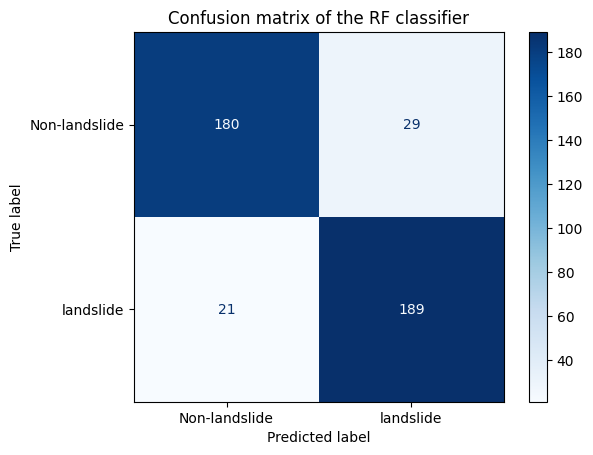

In [118]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, 
                                        cmap="Blues", 
                                        display_labels=["Non-landslide", "landslide"])

plt.title('Confusion matrix of the RF classifier')
plt.show()

Printing overall accuracy (all the correctly classified samples divided by the total number of samples)

In [119]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_rf))

0.8806682577565632


Checking how our model is different from a classification created by a random process

In [120]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test, y_pred_rf))

0.7613134029075331


Plotting ROC_AUC

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


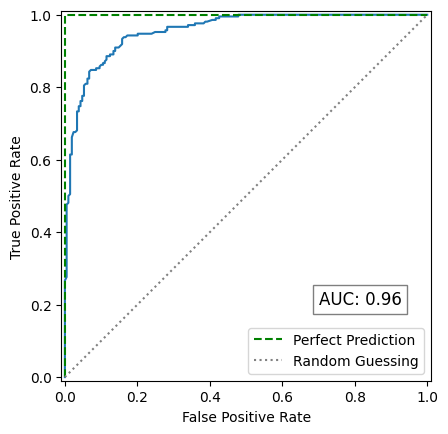

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score



y_val_scores = model_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_val_scores)# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_val_scores)


roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

plt.text(0.7, 0.2, f'AUC: {auc_score:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.plot([0, 0, 1], [0, 1, 1], color='green', linestyle='--', label='Perfect Prediction')
plt.plot([0, 1], [0, 1], color='grey', linestyle=':', label='Random Guessing')


plt.legend(loc='lower right')
plt.show()

External Validation on the dataset outside of our AOI

Reading the data (landslide absence and presence points). The data is unseen by the models, as it comes outside of the AOI, and it has not earlier been used for training or testing

In [136]:
external_val_data=pd.read_csv("E:\CSV - TrainingData - Mai\\ExternalValidation_50%roadsremoved.csv")

Dropping unwanted columns

In [137]:
external_val_data= external_val_data.drop(columns=['geometry']) # / Remove unwanted columns if needed

In [138]:
external_val_data.head()

Landslide  eastness   profile  northernes       spi      tri      twi  \
0          0  0.962323  0.000732   -0.271910  0.000000  1.60449  5.32411   
1          0  0.372662  0.052982   -0.927967  0.000000  3.90396  4.58652   
2          0 -0.967150 -0.001381    0.254208 -0.057006  2.92559  5.35490   
3          0  0.463936  0.023859   -0.885869  2.181400  5.55362  5.82474   
4          0 -0.987253  0.014977   -0.159158  3.104450  3.71801  7.44055   

   elevation   d_river  landforms    d_roads  losmasse      ndvi   a_perc  \
0  160.31200  474.6850          6    36.3605        12  0.166702  2363.78   
1    3.91479  591.7320          6   444.4200        70  0.166677  2548.66   
2  313.22700  346.1680          6  2091.6800        12  0.166693  2809.23   
3  234.45300  226.3830          9   197.7730        70  0.166695  3852.65   
4    7.32115   54.9886          6  1180.3000       130  0.166693  2848.11   

   landuse  soil_con  
0        3         2  
1        3         4  
2        2         4  
3        3         4  
4        2         4

In [139]:
external_val_data.describe()

Landslide    eastness     profile  northernes         spi         tri  \
count  466.000000  466.000000  466.000000  466.000000  466.000000  466.000000   
mean     0.497854    0.027988   -0.003924    0.106664    1.798560    5.550354   
std      0.500533    0.647358    0.041469    0.755574    2.114801    4.380806   
min      0.000000   -0.999996   -0.175265   -0.999975   -2.856220    0.162709   
25%      0.000000   -0.560600   -0.018696   -0.705606    0.000000    2.383950   
50%      0.000000    0.023147   -0.001758    0.300475    1.234345    4.815560   
75%      1.000000    0.622909    0.014059    0.861702    3.019942    7.499370   
max      1.000000    0.999962    0.141287    0.999998    9.087540   39.252300   

              twi   elevation      d_river   landforms      d_roads  \
count  466.000000  466.000000   466.000000  466.000000   466.000000   
mean     6.261560  220.624309   313.851501    5.229614   321.572040   
std      2.077542  178.643031   376.680053    2.242517   506.299583   
min      3.033100    0.000000     0.000000    0.000000     0.000000   
25%      4.801913   52.982175    72.462600    4.000000     5.149287   
50%      5.765505  198.534500   193.545000    6.000000   133.626000   
75%      7.123630  336.510250   441.183250    6.000000   435.496500   
max     16.373600  891.430000  4491.510000   10.000000  3669.510000   

         losmasse        ndvi       a_perc     landuse    soil_con  
count  466.000000  466.000000   466.000000  466.000000  466.000000  
mean    53.978541    0.166695  2819.719227    3.072961    2.160944  
std     48.108788    0.000009   385.700636    1.939693    1.115800  
min     11.000000    0.166662  1638.500000    1.000000    1.000000  
25%     12.000000    0.166693  2593.820000    2.000000    1.000000  
50%     20.000000    0.166698  2843.930000    3.000000    2.000000  
75%     81.000000    0.166701  3053.897500    3.000000    2.000000  
max    307.000000    0.166710  3992.650000   10.000000    7.000000

In [140]:
external_val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Landslide   466 non-null    int64  
 1   eastness    466 non-null    float64
 2   profile     466 non-null    float64
 3   northernes  466 non-null    float64
 4   spi         466 non-null    float64
 5   tri         466 non-null    float64
 6   twi         466 non-null    float64
 7   elevation   466 non-null    float64
 8   d_river     466 non-null    float64
 9   landforms   466 non-null    int64  
 10  d_roads     466 non-null    float64
 11  losmasse    466 non-null    int64  
 12  ndvi        466 non-null    float64
 13  a_perc      466 non-null    float64
 14  landuse     466 non-null    int64  
 15  soil_con    466 non-null    int64  
dtypes: float64(11), int64(5)
memory usage: 58.4 KB


In [141]:
external_val_data['Landslide'].value_counts()

Landslide
0    234
1    232
Name: count, dtype: int64

Dividing the data into variables and the labels

In [142]:
X_val = external_val_data.iloc[:, 1:] # Select all rows (:) and columns except for the first column

In [143]:
X_val.head()

eastness   profile  northernes       spi      tri      twi  elevation  \
0  0.962323  0.000732   -0.271910  0.000000  1.60449  5.32411  160.31200   
1  0.372662  0.052982   -0.927967  0.000000  3.90396  4.58652    3.91479   
2 -0.967150 -0.001381    0.254208 -0.057006  2.92559  5.35490  313.22700   
3  0.463936  0.023859   -0.885869  2.181400  5.55362  5.82474  234.45300   
4 -0.987253  0.014977   -0.159158  3.104450  3.71801  7.44055    7.32115   

    d_river  landforms    d_roads  losmasse      ndvi   a_perc  landuse  \
0  474.6850          6    36.3605        12  0.166702  2363.78        3   
1  591.7320          6   444.4200        70  0.166677  2548.66        3   
2  346.1680          6  2091.6800        12  0.166693  2809.23        2   
3  226.3830          9   197.7730        70  0.166695  3852.65        3   
4   54.9886          6  1180.3000       130  0.166693  2848.11        2   

   soil_con  
0         2  
1         4  
2         4  
3         4  
4         4

In [144]:
y_val = external_val_data["Landslide"]

Random Forest

Predicting the classes of the external validation data with our trained RF classifier

In [145]:
y_pred_rf_val = model_rf.predict(X_val)

In [146]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_val, y_pred_rf_val), 4)

0.7618

In [147]:
# Classification report of the eternal validation area
print(classification_report(y_val, y_pred_rf_val, target_names = ['non-landslide', 'landslide']))

               precision    recall  f1-score   support

non-landslide       0.73      0.83      0.78       234
    landslide       0.80      0.69      0.74       232

     accuracy                           0.76       466
    macro avg       0.77      0.76      0.76       466
 weighted avg       0.77      0.76      0.76       466



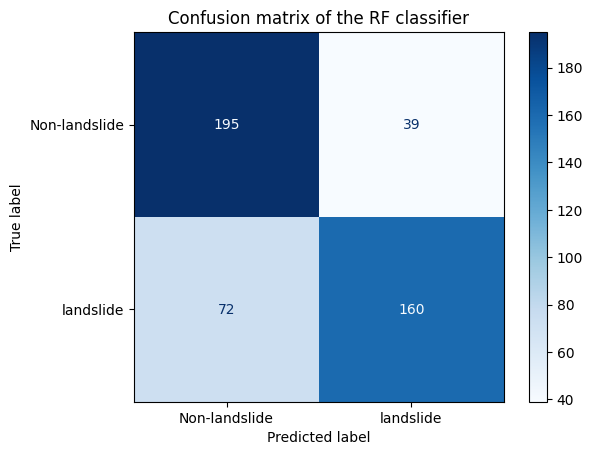

In [148]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_rf_val, 
                                        cmap="Blues", 
                                        display_labels=["Non-landslide", "landslide"])

plt.title('Confusion matrix of the RF classifier')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


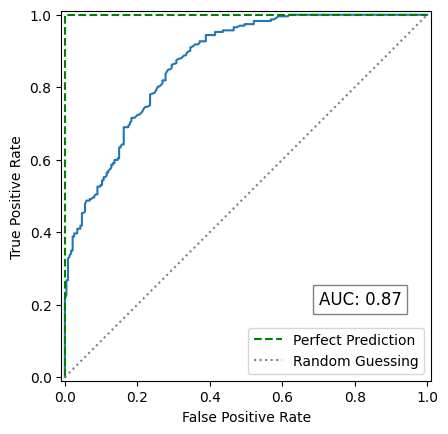

In [149]:
# Predict probabilities

y_val_scores = model_rf.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_scores)# Calculate the AUC score
auc_score = roc_auc_score(y_val, y_val_scores)


roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

plt.text(0.7, 0.2, f'AUC: {auc_score:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.plot([0, 0, 1], [0, 1, 1], color='green', linestyle='--', label='Perfect Prediction')
plt.plot([0, 1], [0, 1], color='grey', linestyle=':', label='Random Guessing')


plt.legend(loc='lower right')
plt.show()

Making susceptibility maps with our trained classifier

Predicting probability with trained RF classifier

In [80]:
result_rf = stack.predict_proba(model_rf)

#result_rf = stack.predict(model_rf) #If we only want predict just the actual class (landslide 0 or 1)

c:\ProgramData\anaconda3\envs\sklearnML\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\sklearnML\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\sklearnML\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\sklearnML\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\sklearnML\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\env

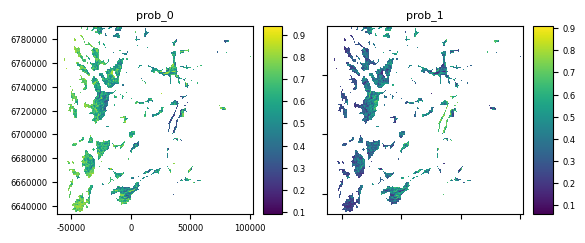

In [81]:
result_rf.plot()
plt.show()

In [82]:
result_rf.write("Q:\\LSM - Output\\Landslide_locations_rf_NGU_method.tif")

Raster Object Containing 2 Layers
    attribute                                             values
0       names                                   [prob_0, prob_1]
1       files  [Q:/LSM - Output/Landslide_locations_rf_NGU_me...
2        rows                                              31632
3        cols                                              32884
4         res                                         (5.0, 5.0)
5  nodatavals  [-3.4028234663852886e+38, -3.4028234663852886e...
